### Data Cleaning
2021-08-27

by: Alberto Josué

cleaned up data-removed 0 producction coal mines 

In [3]:
output_file = "../data/clean_coalpublic2019_log.xls"
import pandas as pd
import numpy as np

In [4]:
df= pd.read_excel("../data/coalpublic2019.xls", header=3, index_col='MSHA ID')

In [5]:
df.head()

,Year,Mine Name,Mine State,Mine County,Mine Status,Mine Type,Company Type,Operation Type,Operating Company,Operating Company Address,Union Code,Coal Supply Region,Production (short tons),Average Employees,Labor Hours
MSHA ID,,,,,,,,,,,,,,,
103489,2019,John Poe Mine,Alabama,De Kalb,Active,Surface,Indepedent Producer Operator,Mine only,Kennedy Brothers Construction,"756 Co. Rd 676, Fort Payne, AL 35968",NaN,Appalachia Southern,2913,2,720
100329,2019,Oak Grove Preparation Plant,Alabama,Jefferson,Active,Underground,Indepedent Producer Operator,Preparation Plant,Murray Oak Grove Coal Llc,"8360 Taylors Ferry Rd, Hueytown, AL 35023",United Mine Workers Of America,Appalachia Southern,0,58,152268
100627,2019,Flat Top Mine,Alabama,Jefferson,Active,Surface,Indepedent Producer Operator,Mine only,"Cedar Lake Mining, Inc","P.O. Box 1608, Jasper, AL 35502",NaN,Appalachia Southern,259730,40,112709
100851,2019,Oak Grove Mine,Alabama,Jefferson,Active,Underground,Indepedent Producer Operator,Mine only,Murray Oak Grove Coal Llc,"8360 Taylors Ferry Rd, Bessemer, AL 35023",United Mine Workers Of America,Appalachia Southern,1364382,456,1094695
101401,2019,No 7 Mine,Alabama,Jefferson,Active,Underground,Indepedent Producer Operator,Mine and Preparation Plant,"Warrior Met Coal Mining, Llc","P.O. Box 133, Brookwood, AL 35444",United Mine Workers Of America,Appalachia Southern,6247986,869,2244324


In [6]:
df['Company Type'].unique()

array(['Indepedent Producer Operator', 'Operating Subsidiary',
       'Contractor'], dtype=object)

Mistake rename indepedent to independent

In [7]:
df['Company Type'].replace(to_replace='Indepedent Producer Operator', 
                           value='Independent Producer Operator',
                          inplace=True)

Changing spaces to underscores

In [8]:
df.rename(columns=lambda x: x.replace (" ","_"), inplace=True)

Here the data is removed. 
Coal mines with no coal production.

In [39]:
df=df[df['Production_(short_tons)']>0]

In [40]:
len(df)


669

Creating a new column logarithm of the production.

In [45]:
df['Log_Production']=np.log(df['Production_(short_tons)'])

<ipython-input-45-df324a148256>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Log_Production']=np.log(df['Production_(short_tons)'])


<AxesSubplot:>

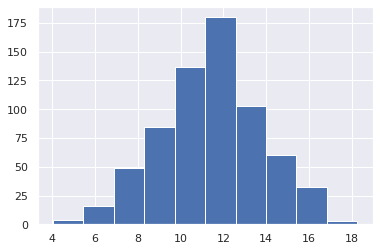

In [47]:
df.Log_Production.hist()

In [48]:
df.to_csv(output_file)